<a href="https://colab.research.google.com/github/ABDOULAYEDIOP150/TP_SVM/blob/main/descente_gradient_louvain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

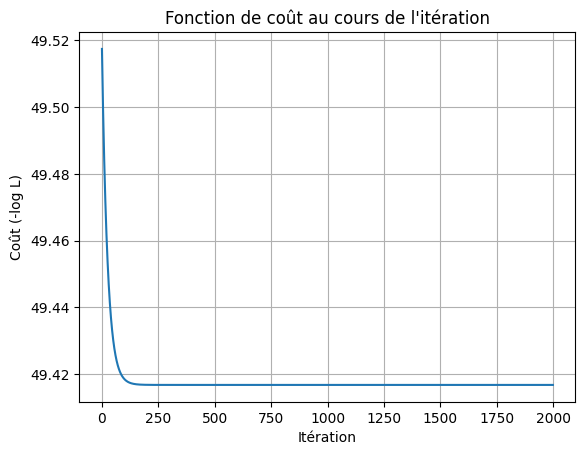

Valeur optimale de p: 0.4000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données
A = np.array([[0, 1, 1], [1, 0, 0], [1, 0, 0]])  # Matrice d'adjacence
k = np.array([2, 1, 1])  # Degrés des nœuds
m = np.sum(A) / 2  # Nombre total d'arêtes
C = np.array([0, 0, 1])  # Communautés associées à chaque nœud (exemple)

# Fonction pour calculer la log-vraisemblance
def log_likelihood(p, A, k, m, C):
    logL = 0
    n = A.shape[0]

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                logL += A[i, j] * np.log(p) + (1 - A[i, j]) * np.log(1 - p)
            else:
                prob = 2 * m / (k[i] * k[j])
                prob = np.clip(prob, 1e-10, 1 - 1e-10)  # Pour éviter des valeurs extrêmes
                logL += A[i, j] * np.log(prob) + (1 - A[i, j]) * np.log(1 - prob)

    return logL

# Fonction pour calculer la négation de la log-vraisemblance
def negative_log_likelihood(p, A, k, m, C):
    return -log_likelihood(p, A, k, m, C)

# Fonction pour calculer la dérivée de la négative log-vraisemblance par rapport à p
def gradient_negative_log_likelihood(p, A, C):
    grad = 0
    n = A.shape[0]

    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:  # Vérifie si i et j appartiennent à la même communauté
                grad += -(A[i, j] / p) + ((1 - A[i, j]) / (1 - p))

    return grad

# Descente de gradient avec enregistrement de la fonction de coût
def gradient_descent(A, k, m, C, p_init=0.5, learning_rate=0.001, max_iter=2000):
    p = p_init
    cost_history = []  # Liste pour enregistrer l'historique de la fonction de coût

    for _ in range(max_iter):
        cost = negative_log_likelihood(p, A, k, m, C)  # Calculer le coût actuel
        cost_history.append(cost)  # Enregistrer le coût
        grad = gradient_negative_log_likelihood(p, A, C)

        if np.isnan(grad) or np.isinf(grad):
            print(f"Gradient invalide à l'itération {_}: {grad}")
            break

        p -= learning_rate * grad  # Mise à jour du paramètre p

        # Pour éviter que p soit hors des limites [0, 1]
        p = np.clip(p, 1e-10, 1 - 1e-10)

    return p, cost_history

# Exécution de la descente de gradient
optimal_p, cost_history = gradient_descent(A, k, m, C)

# Tracer la fonction de coût
plt.plot(cost_history)
plt.title("Fonction de coût au cours de l'itération")
plt.xlabel("Itération")
plt.ylabel("Coût (-log L)")
plt.grid()
plt.show()

print(f"Valeur optimale de p: {optimal_p:.4f}")
